# ENGR 1330 – Computational Thinking and Data Science

## Machine Learning

Machine learning (ML) is the process of  building algorithms that are capable of ‘learning’ from data. ML takes a dataset and attempts to fit a model to the data such that the model can make accurate predictions on data that is either unknown or to fill in missing parts of the data. An example of this would be using ML to predict what videos a user might want to watch based on what they viewed previously. 

The purpose of a Machine learning system is to:
- Fit a model to a dataset 
- Use the model to make predictions about the future
- Use the model to fill in missing data 

This project will develop scripts to train a machine learning model. 

### Background
Scikit will be used to generate and train the model along with making the predictions. Scikit is a common machine learning library and is a good place to start learning about machine learning. The model type for this project will be Support Vector Machine (SVM) that takes in a vector with each element of the vector representing a variable. 

To learn more about Scikit SVM models read the documentation found here:
https://scikit-learn.org/stable/modules/svm.html#svm

## Objective(s):
- Train a model using prvided dataset with a 80/20 training/validation split.
- test your model against the validation set
- predict the future

## Presentation
Prepare a 5-8 min presentation that will be given to the class. 
The presentation should include:
- Description of the dataset used
- Histogram of the weights
- A graph of the data and model
- Accuracy of the model when tested against the validation set
- Graph of the data along with the predicted data
- Predict data using an x that you come up with that is not included in the data
- Expect to be asked questions about the data and model as well as what variables played the largest role.

## Submission 
- Your presentation slides, jupyter notebook, and pdf of the jupyter notebook must be submitted BEFORE the your present.

## Libraries 
- numpy
- pandas
- matplotlib
- scikit

<h7>Timur Abdilov</h7>
<br>
<h7>Mohammed Uddin</h7>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


#Just increases area of jupyter notebook

# 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report


from sklearn.ensemble import RandomForestClassifier


## Data
- using statistics and graphs describe your data

In [4]:
# read in the data
df_heart = pd.read_csv("heart_failure_clinical_records_dataset.csv")

df_heart.head(10)
#just look at 10 first rows of dataframe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
# Produce descriptive statistics of the data
df_heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df_heart.isnull().sum()
#there is no missing values in dataset (fortunately)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# 

In [8]:
df_heart.corr(method="pearson")
#correlation matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


# 

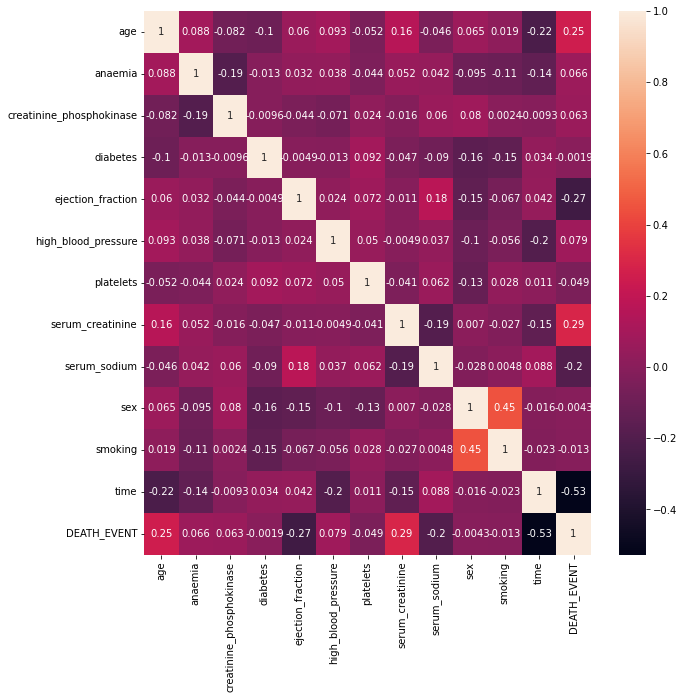

In [9]:
#seaborn heatmap (correlation matrix)

plt.figure(figsize=(10,10))
sns.heatmap(df_heart.corr(),annot=True)
plt.show()

# 

[0.09036431 0.01299244 0.0791755  0.0132407  0.11124064 0.01454206
 0.07853698 0.13938366 0.0697331  0.0103316  0.01426363 0.36619537]


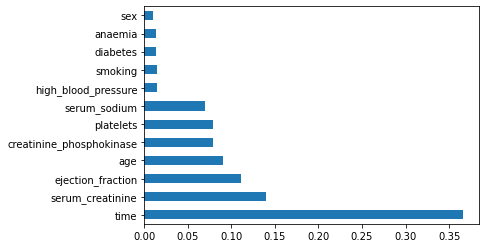

In [10]:
x = df_heart.drop(columns='DEATH_EVENT')
y = df_heart['DEATH_EVENT']

model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# 

In [11]:
sns.set_theme(style="whitegrid")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


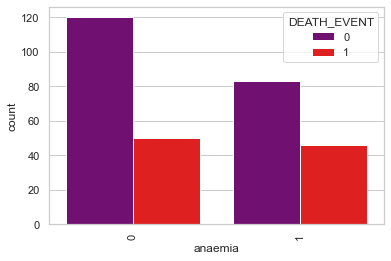

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


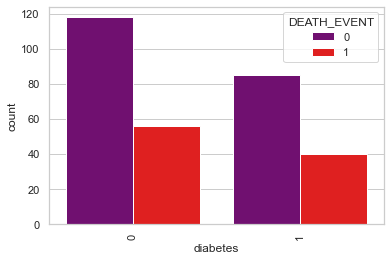

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


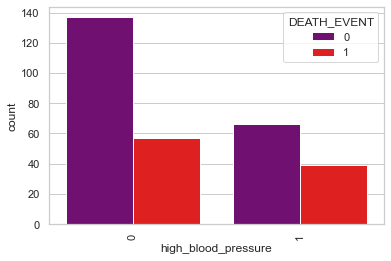

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


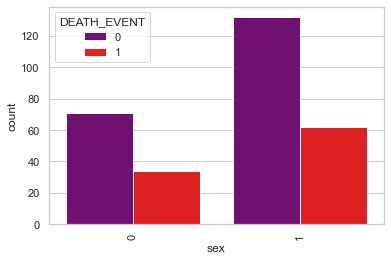

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


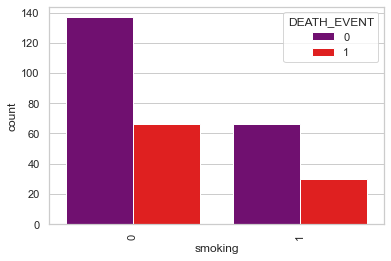

In [12]:
def death(col):
    rel_plots = sns.countplot(df_heart[col],hue=df_heart.DEATH_EVENT,palette=["purple","red"])
    plt.xticks(rotation=90);
    plt.show()
columns=['anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking']
for col in columns:
    death(col)

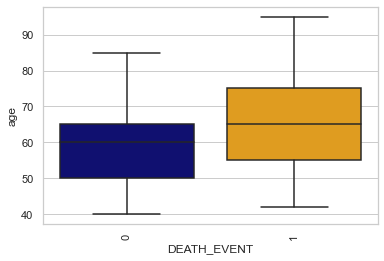

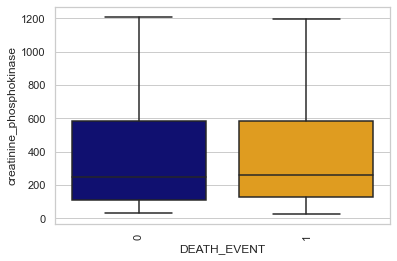

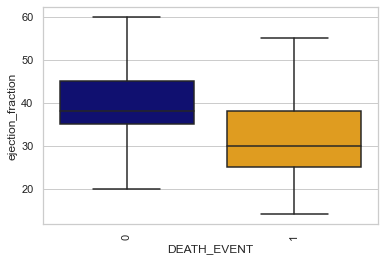

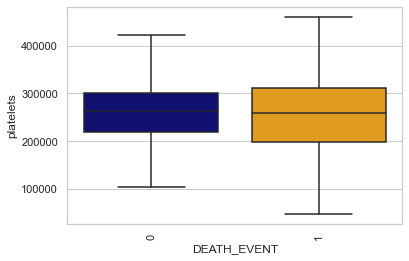

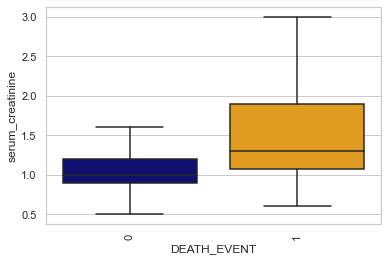

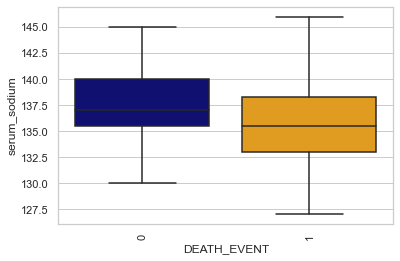

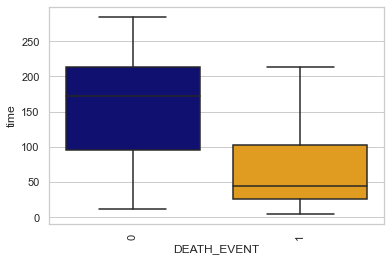

In [157]:
def plt_transported_box(col):
    sns.boxplot(y=df_heart[col],x=df_heart.DEATH_EVENT,showfliers=False, palette=["navy","orange"])
    plt.xticks(rotation=90);
    plt.show()
columns = ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for col in columns:
    plt_transported_box(col)

In [70]:
x_vector = df_heart.drop(columns='DEATH_EVENT')
y_vector = df_heart['DEATH_EVENT']



# 

## Machine Learning
- use the code to generate a model
- start by pick data to use as your x and y
- split your data into a training set (80) and a validation set (20)

In [75]:
# save your x and y for the training/validation sets
# use x_train/y_train and x_val,y_val
x_train, x_val, y_train, y_val = train_test_split(x_vector, y_vector, test_size=0.2, random_state=0)

In [76]:
x_train.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
134,81.0,0,4540,0,35,0,231000.0,1.18,137,1,1,107
145,50.0,0,185,0,30,0,266000.0,0.70,141,1,1,112
63,45.0,0,582,0,35,0,385000.0,1.00,145,1,0,61
292,52.0,0,190,1,38,0,382000.0,1.00,140,1,1,258
284,50.0,1,54,0,40,0,279000.0,0.80,141,1,0,250


In [84]:
# from sklearn import svm
# # if you want a classification use this code
# model_classification = svm.SVC()
# model_classification.fit(x_train, y_train)

# # # if you want regression use this code
# # model_regression = svm.SVR()
# # model_regression.fit(x_train, y_train)
# y_pred = model_classification.fit(x_train, y_train).predict(x_val)
#svm.classifie bad algo for trhis problem since it gives too many  
#False Negatuive (type 2 error) that is prohibited in medical diagnosis

In [129]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



#RandomForestClassifier(random_state=0)
#GaussianNB()
#DecisionTreeClassifier()
#SVC()
#KNeighborsClassifier()



y_pred_1 = GaussianNB().fit(x_train, y_train).predict(x_val)
y_pred_2 = RandomForestClassifier(random_state=1).fit(x_train, y_train).predict(x_val)
y_pred_3 = KNeighborsClassifier().fit(x_train, y_train).predict(x_val)
y_pred_4 = DecisionTreeClassifier(random_state=1).fit(x_train, y_train).predict(x_val)
y_pred_5 = SVC(random_state=1).fit(x_train, y_train).predict(x_val)
y_pred_6 = LogisticRegression().fit(x_train, y_train).predict(x_val)


## Machine Learning Testing
- use a loop to test your model against the validation set you created
- make a graph with a scater plot of the data and a plot of the model

In [92]:
hrt_val = x_val.copy()
hrt_val['real'] = y_val.values
hrt_val['pred'] = y_pred_2
hrt_val

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,real,pred
206,40.000,1,101,0,40,0,226000.00,0.80,141,0,0,187,0,0
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172,0,0
12,45.000,1,981,0,30,0,136000.00,1.10,137,1,0,11,1,1
219,55.000,0,582,1,35,1,371000.00,0.70,140,0,0,197,0,0
237,70.000,0,232,0,30,0,173000.00,1.20,132,1,0,210,0,0
136,65.000,1,59,1,60,0,172000.00,0.90,137,0,0,107,0,0
228,65.000,0,56,0,25,0,237000.00,5.00,130,0,0,207,0,0
205,50.000,1,167,1,45,0,362000.00,1.00,136,0,0,187,0,0
52,60.000,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1,1
108,63.000,0,936,0,38,0,304000.00,1.10,133,1,1,88,0,0


In [105]:
# # use this loop to test your model, you will need to talk about the error
# error = 0
# n = len(x_val)
# for i in range(n):
#     y_pred = model.predict(x_val[i])
#     error = error + (y_pred - y_val)**2
# MSE = error / n
# RMSE = np.sqrt(MSE)

In [86]:
sns.set_theme(style="white")

In [132]:
from sklearn.metrics import accuracy_score

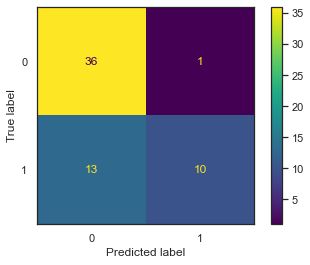

In [124]:
# use the model to make a prediction about an unknown
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

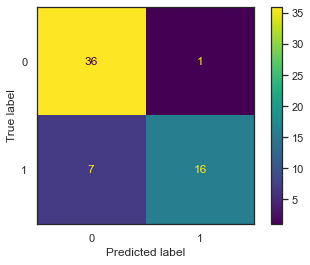

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [133]:
accuracy_score(y_val, y_pred_2)

0.8666666666666667

In [139]:
#  f1_score, recall_score, precision_score, confusion_matrix
# f1_score(y_val, y_pred_2)
print(classification_report(y_val, y_pred_2))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.94      0.70      0.80        23

    accuracy                           0.87        60
   macro avg       0.89      0.83      0.85        60
weighted avg       0.88      0.87      0.86        60



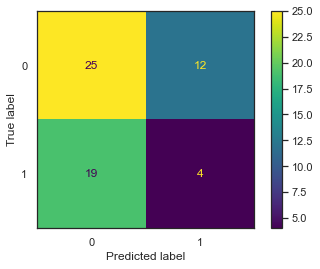

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

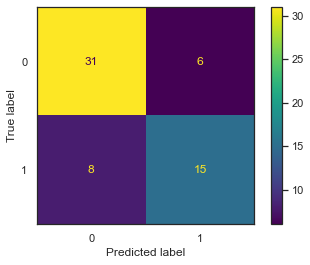

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

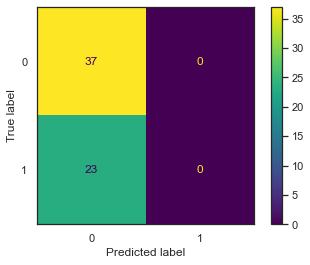

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

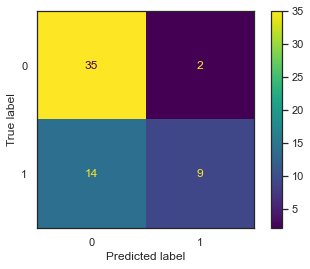

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_6)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### 

# 

# Same output with normalized data

In [13]:
from sklearn.preprocessing import StandardScaler
DF1 = df_heart.drop(columns=["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"], axis=1)

In [14]:
DF1 #drop binary data becauase we don't need to normalize it. Algorithms won't work if we normalize binary values (classes 0,1)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [17]:
df_heart_norm = StandardScaler().fit_transform(DF1)
#StandardScaler() just transform number to normal values (x-u)/std

In [20]:
df_heart_norm = pd.DataFrame(df_heart_norm, columns=DF1.columns)
df_heart_norm.head(5)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [21]:
df_heart_norm.describe()
#some descriptive stats for normalized dataset

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.265205e-16,3.713120e-18,3.341808e-18,1.009969e-16,-2.227872e-18,-8.627435e-16,-1.069379e-16
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-5.769178e-01,-2.038387e+00,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.629502e+00
25%,-8.281242e-01,-4.803931e-01,-6.841802e-01,-5.208700e-01,-4.782047e-01,-5.959961e-01,-7.389995e-01
50%,-7.022315e-02,-3.425744e-01,-7.076750e-03,-1.390846e-02,-2.845524e-01,8.503384e-02,-1.969543e-01
75%,7.718891e-01,1.657284e-04,5.853888e-01,4.111199e-01,5.926150e-03,7.660638e-01,9.387595e-01
max,2.877170e+00,7.514640e+00,3.547716e+00,6.008180e+00,7.752020e+00,2.582144e+00,1.997038e+00


In [23]:
df_heart_norm['anaemia'] = df_heart['anaemia']
df_heart_norm['diabetes'] = df_heart['diabetes']
df_heart_norm['smoking'] = df_heart['smoking']
df_heart_norm['high_blood_pressure'] = df_heart['high_blood_pressure']
df_heart_norm['sex'] = df_heart['sex']
df_heart_norm['DEATH_EVENT'] = df_heart['DEATH_EVENT']
df_heart_norm.head(5)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,smoking,high_blood_pressure,sex,DEATH_EVENT
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,0,1,1,1
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,0,1,1
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,1,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,0,1,1
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0,1


In [26]:
x_n = df_heart_norm.drop(columns='DEATH_EVENT')
y_n = df_heart_norm['DEATH_EVENT']
y_n.head(5)
#drop DEATH EVENT from dataframe bcs it is a value(class) we need to predict
#AI will be trained on x_n to predict y_n 

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [27]:
x_train_n, x_val_n, y_train_n, y_val_n = train_test_split(x_n, y_n, test_size=0.2, random_state=0)

In [29]:
y_pred = RandomForestClassifier().fit(x_train_n, y_train_n).predict(x_val_n)

In [32]:
hrt_val_n = x_val_n.copy()
hrt_val_n['real'] = y_val_n.values
hrt_val_n['prediction'] = y_pred
hrt_val_n

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,smoking,high_blood_pressure,sex,real,prediction
206,-1.754448,-0.496394,0.162199,-3.826077e-01,-0.575031,0.993074,0.732266,1,0,0,0,0,0,0
188,-0.014054,-0.444777,0.162199,-6.386489e-01,-0.381379,-0.141976,0.538678,1,1,0,1,0,0,0
12,-1.333392,0.412073,-0.684180,-1.304356e+00,-0.284552,0.085034,-1.539162,1,0,0,0,1,1,1
219,-0.491279,0.000166,-0.260991,1.102431e+00,-0.671857,0.766064,0.861324,0,1,0,1,0,0,0
237,0.771889,-0.361157,-0.684180,-9.254150e-01,-0.187726,-1.050016,1.029100,0,0,0,0,1,0,0
136,0.350833,-0.539753,1.854958,-9.356567e-01,-0.478205,0.085034,-0.300201,1,1,0,0,0,0,0
228,0.350833,-0.542850,-1.107370,-2.699496e-01,3.491668,-1.504036,0.990383,0,0,0,0,0,0,0
205,-0.912335,-0.428259,0.585389,1.010256e+00,-0.381379,-0.141976,0.732266,1,1,0,0,0,0,0
52,-0.070223,3.491573,2.024234,7.535660e-09,5.234539,2.128124,-1.126175,0,1,0,0,0,1,1
108,0.182411,0.365618,-0.007077,4.162407e-01,-0.284552,-0.823006,-0.545412,0,0,1,0,1,0,0


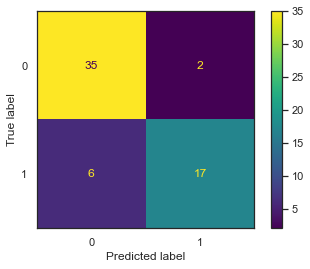

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
sns.set_theme(style="white")
conf_mat_n = confusion_matrix(y_val_n, y_pred)
disp_n = ConfusionMatrixDisplay(confusion_matrix = conf_mat_n)
disp_n.plot()
plt.show()


#Compute confusion matrix to evaluate the accuracy of a classification.

In [68]:

right_n = np.sum(y_pred==y_val_n)
error_n = np.sum(y_pred!=y_val_n)
print("number of right predictions",right_n, "\nnumber of wrong predictions",error_n)


number of right predictions 52 
number of wrong predictions 8


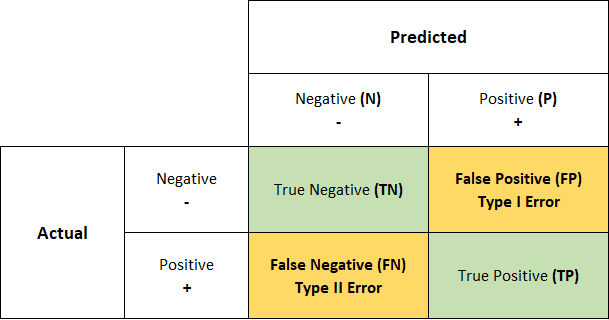